In [22]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as T
from matplotlib import pyplot as plt
from PIL import Image

# Visualizing ***Input***, ***Predicted***, ***CRF***, and ***Target*** images

#### Create a color pallette, selecting a color for each class



In [192]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

In [193]:
# generating target image
target =  torch.from_numpy(np.load('/content/target_2856.npy'))[0]
# plot the semantic segmentation predictions of 21 classes in each color
target = Image.fromarray(target.byte().cpu().numpy())
target.putpalette(colors)

# generating target image
output = torch.from_numpy(np.load('/content/output_2856.npy'))[0]
output = output.argmax(0)
# plot the semantic segmentation predictions of 21 classes in each color
output = Image.fromarray(output.byte().cpu().numpy())
output.putpalette(colors)

# generating target image
crf = torch.from_numpy(np.load('/content/crf_2856.npy'))
# plot the semantic segmentation predictions of 21 classes in each color
crf = Image.fromarray(crf.byte().cpu().numpy())
crf.putpalette(colors)

# generating target image
MEAN = torch.tensor([0.485, 0.456, 0.406])
STD = torch.tensor([0.229, 0.224, 0.225])
image = torch.from_numpy(np.load('/content/image_2856.npy'))[0]
image = image * STD[:, None, None] + MEAN[:, None, None]
image = np.array(image).transpose(1, 2, 0)

Text(0.5, 1.0, 'CRF')

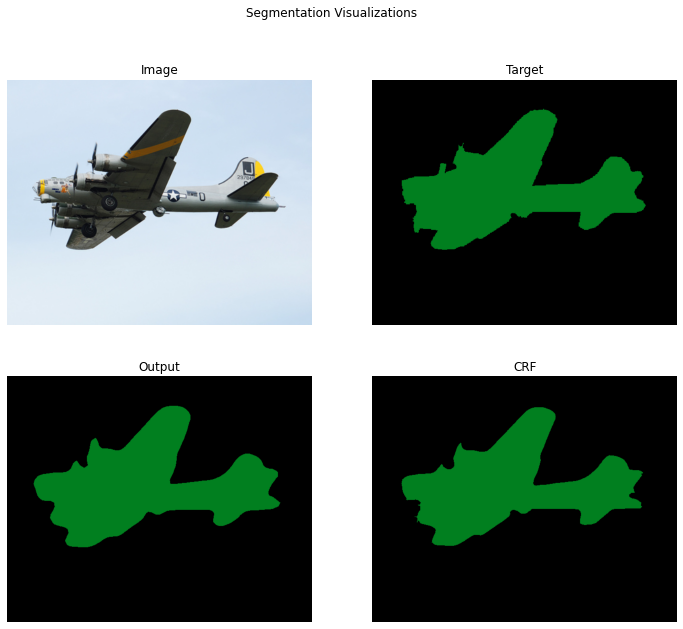

In [201]:
# create figure
fig = plt.figure(figsize=(12, 10))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = image
Image2 = target
Image3 = output
Image4 = crf
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.suptitle('Segmentation Visualizations')
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Target")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Output")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("CRF")